# The Birthday Paradox

In a room with N people, what is the probability of two people sharing the same birthday?

In this scenario, we are going to assume:
1. No twins
2. No leap years
3. No patterns

## Calculate Probability of Not Having the Same Birthday


$$ p = \frac{365}{365} x \frac{364}{365} x \frac{363}{365} x ... x \frac{365-N+1}{365} $$

$$ p = \frac{365!}{(365-N)! x 365^{N}} $$

## Calculate Probability of Having the Same Birthday

$$ p = 1 - \frac{365!}{(365-N)! x 365^{N}} $$

In [13]:
import math
from decimal import Decimal # use Decimal to overcome OverFlow Error

def same_birthday_probability(N):
    p_not_same_birthday = math.factorial(365) / ( math.factorial(365-N) * pow(Decimal(365),N) )
    p_same_birthday = 1 - float(p_not_same_birthday)
    return round(p_same_birthday,4)

## Few Examples

In [14]:
import numpy as np

# Room of 5
print(f'In a room of 5, the probability of at least two people having the same birthday is {same_birthday_probability(5)}')

# Room of 10
print(f'In a room of 10, the probability of at least two people having the same birthday is {same_birthday_probability(10)}')

# Room of 15
print(f'In a room of 15, the probability of at least two people having the same birthday is {same_birthday_probability(15)}')

people = np.arange(1, 366, 1)
probs = {n:same_birthday_probability(n) for n in people}

# at least 50%
for key,value in probs.items():
    if value >= 0.5:
        print(f'Number of people needed to get at least 50% probability: {key}')
        break
        
# 99%
for key,value in probs.items():
    if value >= 0.99:
        print(f'Number of people needed to get at least 99% probability: {key}')
        break

In a room of 5, the probability of at least two people having the same birthday is 0.0271
In a room of 10, the probability of at least two people having the same birthday is 0.1169
In a room of 15, the probability of at least two people having the same birthday is 0.2529
Number of people needed to get at least 50% probability: 23
Number of people needed to get at least 99% probability: 57


## Visualization

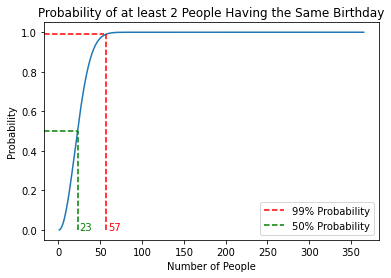

In [15]:
import matplotlib.pyplot as plt

# plot
plt.plot(people, probs.values())
plt.xlabel('Number of People')
plt.ylabel('Probability')
plt.title('Probability of at least 2 People Having the Same Birthday')
plt.vlines(57, ymin = 0, ymax = 0.99, linestyles = 'dashed', color = 'red', label = "99% Probability")
plt.axhline(0.99, xmin = 0, xmax = .18, ls = 'dashed', color = 'red')
plt.text(60, 0, s = '57', c='red')
plt.vlines(23, ymin = 0, ymax = 0.5, linestyles = 'dashed', color = 'green', label = "50% Probability")
plt.axhline(0.5, xmin = 0, xmax = .1, ls = 'dashed', color = 'green')
plt.text(25, 0, s = '23', c='green')
plt.legend()
plt.show()